In [1]:
COLUMNS_REMUNERACAO = [u'REMUNERAÇÃO BÁSICA BRUTA (R$)',
                                                    u'REMUNERAÇÃO BÁSICA BRUTA (U$)',
                                                                  u'ABATE-TETO (R$)',
                                                                  u'ABATE-TETO (U$)',
                                                       u'GRATIFICAÇÃO NATALINA (R$)',
                                                       u'GRATIFICAÇÃO NATALINA (U$)',
                                         u'ABATE-TETO DA GRATIFICAÇÃO NATALINA (R$)',
                                         u'ABATE-TETO DA GRATIFICAÇÃO NATALINA (U$)',
                                                                      u'FÉRIAS (R$)',
                                                                      u'FÉRIAS (U$)',
                                               u'OUTRAS REMUNERAÇÕES EVENTUAIS (R$)',
                                               u'OUTRAS REMUNERAÇÕES EVENTUAIS (U$)',
                                                                        u'IRRF (R$)',
                                                                        u'IRRF (U$)',
                                                                    u'PSS/RPGS (R$)',
                                                                    u'PSS/RPGS (U$)',
                                                              u'PENSÃO MILITAR (R$)',
                                                              u'PENSÃO MILITAR (U$)',
                                                              u'FUNDO DE SAÚDE (R$)',
                                                              u'FUNDO DE SAÚDE (U$)',
                                                             u'DEMAIS DEDUÇÕES (R$)',
                                                             u'DEMAIS DEDUÇÕES (U$)',
                                      u'REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$)',
                                      u'REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (U$)',
         u'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (R$)(*)',
         u'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (U$)(*)',
       u'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (R$)(*)',
       u'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (U$)(*)',
                                           u'TOTAL DE VERBAS INDENIZATÓRIAS (R$)(*)',
                                           u'TOTAL DE VERBAS INDENIZATÓRIAS (U$)(*)',]

In [2]:
import pandas as pd
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from matplotlib import pyplot as plt
import codecs

## remove null characters

In [3]:
def remove_null(filename):
    
    out_filename = 'out_' + filename
    
    f_in = codecs.open(filename, encoding='iso-8859-1')
    f_out = codecs.open('out_' + filename, encoding='iso-8859-1', mode='w')
    for line in f_in.readlines():
        line_w_null = line.replace(u'\x00', '')
        f_out.write(line_w_null)
    f_in.close()
    f_out.close()
    
    return out_filename

## Realizar download do arquivo de servidores em http://www.portaldatransparencia.gov.br/downloads/servidores.asp#getC e extrair na raiz deste projeto

In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 02C5-7B14

 Directory of C:\Users\abevi\Github\analysis-servidores-federal\notebooks

14/11/2016  10:02    <DIR>          .
14/11/2016  10:02    <DIR>          ..
12/11/2016  17:34    <DIR>          .ipynb_checkpoints
14/11/2016  10:02           594.133 1 - Remunera‡Æo.ipynb
12/11/2016  16:54            11.207 2 - Viagens.ipynb
12/11/2016  16:58       382.539.699 20160930_Cadastro.csv
12/11/2016  16:58       136.978.215 20160930_Remuneracao.csv
12/11/2016  16:54            19.909 3 - Nomes similares.ipynb
14/11/2016  09:59            20.372 oi.png
12/11/2016  17:46            84.451 olhae_leonanrdo.csv
12/11/2016  18:17            19.450 olhae_leonanrdo_cargo.csv
12/11/2016  18:06           103.629 olhae_leonanrdo_exercicio.csv
14/11/2016  10:00       373.613.272 out_20160930_Cadastro.csv
14/11/2016  10:00       136.978.215 out_20160930_Remuneracao.csv
              11 File(s)  1.030.962.552 bytes
               3 Dir(s)   6.375

## indicar o nome dos arquivos

In [5]:
cadastro_filename = '20160930_Cadastro.csv'
remuneracao_filename = '20160930_Remuneracao.csv'

## Selecionar servidores da UFC

In [6]:
out_cadastro_filename = remove_null(cadastro_filename)

In [7]:
cadastro = pd.read_csv(out_cadastro_filename, sep='\t', encoding='iso-8859-1', decimal=',')
cadastro_ufc = cadastro[cadastro[u'ORG_LOTACAO'] == u'UNIVERSIDADE FEDERAL DO CEARA']
del cadastro

C:\Users\abevi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (10,12,23,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## join com remuneração

In [8]:
out_remuneracao_filename = remove_null(remuneracao_filename)

In [9]:
remuneracao = pd.read_csv(remuneracao_filename, sep='\t', encoding='iso-8859-1', decimal=',')

In [10]:
df_ufc = pd.merge(cadastro_ufc, remuneracao, left_on=u'Id_SERVIDOR_PORTAL', right_on=u'ID_SERVIDOR_PORTAL')

In [11]:
len(df_ufc)

7270

In [12]:
del remuneracao
del cadastro_ufc

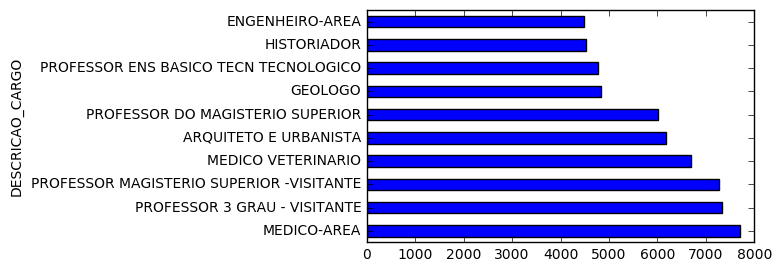

In [23]:
plt.figure(figsize=(5, 3), dpi=300)
ax = df_ufc.groupby('DESCRICAO_CARGO')['REMUNERAÇÃO BÁSICA BRUTA (R$)'].std().sort_values(ascending=False).head(10)\
.plot(kind='barh').get_figure().savefig('oi.png', bbox_inches='tight')

<img src="oi.png" />

## remuneração bruta - top 10

In [22]:
df_ufc.sort_values(u'REMUNERAÇÃO BÁSICA BRUTA (R$)', ascending=False)[[u'REMUNERAÇÃO BÁSICA BRUTA (R$)', u'NOME_x', u'DATA_INGRESSO_ORGAO']].head(10)

,REMUNERAÇÃO BÁSICA BRUTA (R$),NOME_x,DATA_INGRESSO_ORGAO
1978,42605.09,LUIZ BOTELHO ALBUQUERQUE,22/05/2002
2037,40947.35,HENRY DE HOLANDA CAMPOS,22/05/1997
2039,40947.35,HENRY DE HOLANDA CAMPOS,30/07/1998
2038,40947.35,HENRY DE HOLANDA CAMPOS,30/07/1998
6463,40252.16,SEBASTIAO CARNEIRO DE ALMEIDA,25/03/2002
6462,40252.16,SEBASTIAO CARNEIRO DE ALMEIDA,01/04/1973
1928,39009.86,BOANERGES FREIRE DE AQUINO,01/01/1972
1929,39009.86,BOANERGES FREIRE DE AQUINO,16/07/1998
4091,38404.45,ROSALICE NOGUEIRA ANDRADE,01/08/1985
4090,38404.45,ROSALICE NOGUEIRA ANDRADE,11/03/2015


# Indenizatórias - top 10

In [21]:
df_ufc.sort_values(u'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (R$)(*)', ascending=False)[[u'VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (R$)(*)', u'DESCRICAO_CARGO', u'NOME_x', u'DATA_INGRESSO_ORGAO']].head(10)

,VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (R$)(*),DESCRICAO_CARGO,NOME_x,DATA_INGRESSO_ORGAO
4371,17864.62,PROFESSOR DO MAGISTERIO SUPERIOR,FABIANO SEIXAS FERNANDES,15/03/2010
2481,14621.98,PROFESSOR DO MAGISTERIO SUPERIOR,RENATA AQUINO RIBEIRO,19/03/2015
1480,13029.09,PROFESSOR 3 GRAU - VISITANTE,ALEKSANDR SIVATCKII,22/08/2012
306,12959.25,PROFESSOR DO MAGISTERIO SUPERIOR,LUCIANO MARI,18/03/2014
6356,12703.15,PROFESSOR 3 GRAU - VISITANTE,RAUL CRUZ IZQUIERDO,24/08/2012
2162,7356.99,PROFESSOR DO MAGISTERIO SUPERIOR,MICHEL MASCARENHAS SILVA,19/08/2011
2161,7356.99,NaN,MICHEL MASCARENHAS SILVA,19/08/2011
6294,5354.38,PROFESSOR DO MAGISTERIO SUPERIOR,ALEXANDRE BRAGA LIBORIO,26/09/2012
1158,5029.68,PROFESSOR MAGISTERIO SUPERIOR-SUBSTITUTO,KARLA KALINE FERREIRA LOPES,12/01/2015
1172,4319.74,PROFESSOR DO MAGISTERIO SUPERIOR,PRISCILLA BRANDAO SILVA,15/10/2015


In [113]:
df_ufc.loc[df_ufc.SIGLA_FUNCAO.isnull(), ['SIGLA_FUNCAO']] = 'SEM_FUNCAO'

In [135]:
df_ufc['FUNCAO'] = df_ufc.apply(lambda r: '%s:%s' % (r.SIGLA_FUNCAO, r.NIVEL_FUNCAO), axis=1)

In [136]:
gb_funcao = df_ufc.groupby(['UORG_EXERCICIO', 'FUNCAO']).size()

In [137]:
tabelao = gb_funcao.unstack().fillna(0)

In [129]:
# remove dos SEM_FUNCAO os que ja tem função -> ocorre que a base informa um registro por vínculo do servidor
# quem tem função, aparece 2 vezes, uma na função e outra na SEM_FUNCAO
tabelao.loc[:, 'SEM_FUNCAO:nan'] = tabelao['SEM_FUNCAO:nan'] - tabelao.loc[:, tabelao.columns[:-1]].sum(axis=1)

In [138]:
tabelao['Distribuicao Geral'] = tabelao.loc[:, tabelao.columns[:-1]].sum(axis=1) / tabelao.sum(axis=1)

In [139]:
tabelao['QTD FG/CD'] = tabelao.loc[:, tabelao.columns[:-2]].sum(axis=1)

In [140]:
cols = tabelao.columns.tolist()

In [141]:
cols = cols[-3:] + cols[:-3]

In [147]:
tabelao.sort_values('Distribuicao Geral', ascending=False)[cols].to_csv('olhae_leonanrdo_exercicio.csv')

In [146]:
df_ufc[df_ufc['UORG_EXERCICIO'] == 'DIVISAO DE PROGRAMAS ACADEMICOS']

,Id_SERVIDOR_PORTAL,NOME_x,CPF_x,MATRICULA,DESCRICAO_CARGO,CLASSE_CARGO,REFERENCIA_CARGO,PADRAO_CARGO,NIVEL_CARGO,SIGLA_FUNCAO,NIVEL_FUNCAO,FUNCAO,CODIGO_ATIVIDADE,ATIVIDADE,OPCAO_PARCIAL,COD_UORG_LOTACAO,UORG_LOTACAO,COD_ORG_LOTACAO,ORG_LOTACAO,COD_ORGSUP_LOTACAO,ORGSUP_LOTACAO,COD_UORG_EXERCICIO,UORG_EXERCICIO,COD_ORG_EXERCICIO,ORG_EXERCICIO,COD_ORGSUP_EXERCICIO,ORGSUP_EXERCICIO,TIPO_VINCULO,SITUACAO_VINCULO,DATA_INICIO_AFASTAMENTO,DATA_TERMINO_AFASTAMENTO,REGIME_JURIDICO,JORNADA_DE_TRABALHO,DATA_INGRESSO_CARGOFUNCAO,DATA_NOMEACAO_CARGOFUNCAO,DATA_INGRESSO_ORGAO,DOCUMENTO_INGRESSO_SERVICOPUBLICO,DATA_DIPLOMA_INGRESSO_SERVICOPUBLICO,DIPLOMA_INGRESSO_CARGOFUNCAO,DIPLOMA_INGRESSO_ORGAO,DIPLOMA_INGRESSO_SERVICOPUBLICO,UF_EXERCICIO,ANO,MES,ID_SERVIDOR_PORTAL,CPF_y,NOME_y,REMUNERAÇÃO BÁSICA BRUTA (R$),REMUNERAÇÃO BÁSICA BRUTA (U$),ABATE-TETO (R$),ABATE-TETO (U$),GRATIFICAÇÃO NATALINA (R$),GRATIFICAÇÃO NATALINA (U$),ABATE-TETO DA GRATIFICAÇÃO NATALINA (R$),ABATE-TETO DA GRATIFICAÇÃO NATALINA (U$),FÉRIAS (R$),FÉRIAS (U$),OUTRAS REMUNERAÇÕES EVENTUAIS (R$),OUTRAS REMUNERAÇÕES EVENTUAIS (U$),IRRF (R$),IRRF (U$),PSS/RPGS (R$),PSS/RPGS (U$),PENSÃO MILITAR (R$),PENSÃO MILITAR (U$),FUNDO DE SAÚDE (R$),FUNDO DE SAÚDE (U$),DEMAIS DEDUÇÕES (R$),DEMAIS DEDUÇÕES (U$),REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$),REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (U$),VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (R$)(*),VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (U$)(*),VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (R$)(*),VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (U$)(*),TOTAL DE VERBAS INDENIZATÓRIAS (R$)(*),TOTAL DE VERBAS INDENIZATÓRIAS (U$)(*),TOTAL DE HONORÁRIOS (JETONS)
4641,1730069,MARIA TERESA VASCONCELOS LEMOS,***.719.844-**,021****,NaN,NaN,NaN,NaN,NaN,FG,0002,FG:0002,0039,GERENTE,NaN,2.623300e+13,PRO-REITORIA DE ENSINO,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,2.623300e+13,DIVISAO DE PROGRAMAS ACADEMICOS,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,1,ATIVO PERMANENTE,Não informada,Não informada,REGIME JURIDICO UNICO,40 HORAS SEMANAIS,31/03/2015,NaN,31/07/2014,384,31/07/2014,NaN,PORTARIA,PORTARIA,CE,2016,9,1730069,***.719.844-**,MARIA TERESA VASCONCELOS LEMOS,3043.53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2781.0,0.0,-553.31,0.0,-271.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4999.25,0.0,458.0,0.0,0.0,0.0,458.0,0.0,0.0
4642,1730069,MARIA TERESA VASCONCELOS LEMOS,***.719.844-**,021****,ASSISTENTE EM ADMINISTRACAO,D,NaN,202,NaN,SEM_FUNCAO,NaN,SEM_FUNCAO:nan,NaN,NaN,NaN,2.623300e+13,PRO-REITORIA DE ENSINO,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,2.623300e+13,DIVISAO DE PROGRAMAS ACADEMICOS,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,2,ATIVO PERMANENTE,Não informada,Não informada,REGIME JURIDICO UNICO,40 HORAS SEMANAIS,01/09/2014,NaN,31/07/2014,384,31/07/2014,NaN,PORTARIA,PORTARIA,NaN,2016,9,1730069,***.719.844-**,MARIA TERESA VASCONCELOS LEMOS,3043.53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2781.0,0.0,-553.31,0.0,-271.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4999.25,0.0,458.0,0.0,0.0,0.0,458.0,0.0,0.0


In [150]:
qtd_vinculos = df_ufc.groupby(['Id_SERVIDOR_PORTAL', 'FUNCAO']).size().unstack()

In [151]:
sem_fgcd = df_ufc[df_ufc.FUNCAO == 'SEM_FUNCAO:nan']

In [154]:
tudo_legal = pd.merge(qtd_vinculos, sem_fgcd, left_index=True, right_on='Id_SERVIDOR_PORTAL')

In [163]:
geral = tudo_legal.groupby(['DESCRICAO_CARGO'])[qtd_vinculos.columns].sum().fillna(0)

In [164]:
geral.columns

Index(['CD:0001', 'CD:0002', 'CD:0003', 'CD:0004', 'DAS:1011', 'DAS:1013',
       'DAS:1014', 'DAS:1024', 'FG:0001', 'FG:0002', 'FG:0003', 'FG:0004',
       'FG:0005', 'FG:0007', 'FG:1.0', 'FG:2.0', 'FG:4.0', 'FG:7.0',
       'FGR:0002', 'FUC:0001', 'GF:0017', 'GF:0021', 'GF:0022', 'GF:0024',
       'GF:0025', 'GF:0026', 'GF:0027', 'RGA:0005', 'SEM_FUNCAO:nan'],
      dtype='object', name='FUNCAO')

In [165]:
geral.head(2)

FUNCAO,CD:0001,CD:0002,CD:0003,CD:0004,DAS:1011,DAS:1013,DAS:1014,DAS:1024,FG:0001,FG:0002,FG:0003,FG:0004,FG:0005,FG:0007,FG:1.0,FG:2.0,FG:4.0,FG:7.0,FGR:0002,FUC:0001,GF:0017,GF:0021,GF:0022,GF:0024,GF:0025,GF:0026,GF:0027,RGA:0005,SEM_FUNCAO:nan
DESCRICAO_CARGO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ADMINISTRADOR,0.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,23.0,6.0,4.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,98.0
ALMOXARIFE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [166]:
geral['Distribuicao Geral'] = geral.loc[:, geral.columns[:-1]].sum(axis=1) / geral.sum(axis=1)

In [170]:
geral['QTD FG/CD'] = geral.loc[:, tabelao.columns[:-3]].sum(axis=1)

In [174]:
cols = tabelao.columns.tolist()
cols = cols[-3:] + cols[:-3]

In [175]:
geral.sort_values('QTD FG/CD', ascending=False)[cols].to_csv('olhae_leonanrdo_cargo.csv')

In [181]:
df_ufc[(df_ufc.DESCRICAO_CARGO == 'COPEIRO')]

,Id_SERVIDOR_PORTAL,NOME_x,CPF_x,MATRICULA,DESCRICAO_CARGO,CLASSE_CARGO,REFERENCIA_CARGO,PADRAO_CARGO,NIVEL_CARGO,SIGLA_FUNCAO,NIVEL_FUNCAO,FUNCAO,CODIGO_ATIVIDADE,ATIVIDADE,OPCAO_PARCIAL,COD_UORG_LOTACAO,UORG_LOTACAO,COD_ORG_LOTACAO,ORG_LOTACAO,COD_ORGSUP_LOTACAO,ORGSUP_LOTACAO,COD_UORG_EXERCICIO,UORG_EXERCICIO,COD_ORG_EXERCICIO,ORG_EXERCICIO,COD_ORGSUP_EXERCICIO,ORGSUP_EXERCICIO,TIPO_VINCULO,SITUACAO_VINCULO,DATA_INICIO_AFASTAMENTO,DATA_TERMINO_AFASTAMENTO,REGIME_JURIDICO,JORNADA_DE_TRABALHO,DATA_INGRESSO_CARGOFUNCAO,DATA_NOMEACAO_CARGOFUNCAO,DATA_INGRESSO_ORGAO,DOCUMENTO_INGRESSO_SERVICOPUBLICO,DATA_DIPLOMA_INGRESSO_SERVICOPUBLICO,DIPLOMA_INGRESSO_CARGOFUNCAO,DIPLOMA_INGRESSO_ORGAO,DIPLOMA_INGRESSO_SERVICOPUBLICO,UF_EXERCICIO,ANO,MES,ID_SERVIDOR_PORTAL,CPF_y,NOME_y,REMUNERAÇÃO BÁSICA BRUTA (R$),REMUNERAÇÃO BÁSICA BRUTA (U$),ABATE-TETO (R$),ABATE-TETO (U$),GRATIFICAÇÃO NATALINA (R$),GRATIFICAÇÃO NATALINA (U$),ABATE-TETO DA GRATIFICAÇÃO NATALINA (R$),ABATE-TETO DA GRATIFICAÇÃO NATALINA (U$),FÉRIAS (R$),FÉRIAS (U$),OUTRAS REMUNERAÇÕES EVENTUAIS (R$),OUTRAS REMUNERAÇÕES EVENTUAIS (U$),IRRF (R$),IRRF (U$),PSS/RPGS (R$),PSS/RPGS (U$),PENSÃO MILITAR (R$),PENSÃO MILITAR (U$),FUNDO DE SAÚDE (R$),FUNDO DE SAÚDE (U$),DEMAIS DEDUÇÕES (R$),DEMAIS DEDUÇÕES (U$),REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$),REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (U$),VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (R$)(*),VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (U$)(*),VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (R$)(*),VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (U$)(*),TOTAL DE VERBAS INDENIZATÓRIAS (R$)(*),TOTAL DE VERBAS INDENIZATÓRIAS (U$)(*),TOTAL DE HONORÁRIOS (JETONS)
72,1014869,RAIMUNDO ALDEMIR LIMA DO VALE,***.959.253-**,002****,COPEIRO,B,NaN,416,NaN,SEM_FUNCAO,NaN,SEM_FUNCAO:nan,NaN,NaN,NaN,2.623300e+13,COORD DE PERICIA E ASSIST AO SERVIDOR,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,2.623300e+13,COORD DE PERICIA E ASSIST AO SERVIDOR,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,2,ATIVO PERMANENTE,Não informada,Não informada,REGIME JURIDICO UNICO,40 HORAS SEMANAIS,01/03/2005,NaN,01/08/1985,000000001,01/08/1985,NaN,PORTARIA,PORTARIA,NaN,2016,9,1014869,***.959.253-**,RAIMUNDO ALDEMIR LIMA DO VALE,3813.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,-38.88,0.0,-419.49,0.0,0.0,0.0,0.0,0.0,-194.50,0.0,3160.76,0.0,652.50,0.0,0.0,0.0,652.50,0.0,0.0
574,1092960,ANA ISABEL DOS SANTOS SILVA,***.984.393-**,011****,COPEIRO,B,NaN,414,NaN,SEM_FUNCAO,NaN,SEM_FUNCAO:nan,NaN,NaN,NaN,2.623300e+13,DEPTO DE PSICOLOGIA,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,2.623300e+13,DEPTO DE PSICOLOGIA,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,2,ATIVO PERMANENTE,Não informada,Não informada,REGIME JURIDICO UNICO,40 HORAS SEMANAIS,31/05/2001,NaN,05/07/1993,000000001,05/07/1993,NaN,PORTARIA,PORTARIA,CE,2016,9,1092960,***.984.393-**,ANA ISABEL DOS SANTOS SILVA,3484.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,-107.26,0.0,-383.26,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2993.69,0.0,459.52,0.0,0.0,0.0,459.52,0.0,0.0
668,1107280,MARIA DIONISIA DA SILVA,***.587.843-**,002****,COPEIRO,B,NaN,316,NaN,SEM_FUNCAO,NaN,SEM_FUNCAO:nan,NaN,NaN,NaN,2.623300e+13,HOSPITAL UNIVERSITARIO WALTER CANTIDIO,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,2.623300e+13,HOSPITAL UNIVERSITARIO WALTER CANTIDIO,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,2,ATIVO PERMANENTE,Não informada,Não informada,REGIME JURIDICO UNICO,40 HORAS SEMANAIS,31/05/2001,NaN,01/08/1985,000000001,01/08/1985,NaN,PORTARIA,PORTARIA,CE,2016,9,1107280,***.587.843-**,MARIA DIONISIA DA SILVA,4426.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,406.56,0.0,-287.58,0.0,-455.31,0.0,0.0,0.0,0.0,0.0,0.00,0.0,4089.92,0.0,540.30,0.0,0.0,0.0,540.30,0.0,0.0
977,1156229,MARIA CREUSA DE OLIVEIRA SALES,***.993.293-**,002****,COPEIRO,B,NaN,316,NaN,SEM_FUNCAO,N

In [184]:
tudo_legal[tudo_legal.DESCRICAO_CARGO == 'COPEIRO']

FUNCAO,CD:0001,CD:0002,CD:0003,CD:0004,DAS:1011,DAS:1013,DAS:1014,DAS:1024,FG:0001,FG:0002,FG:0003,FG:0004,FG:0005,FG:0007,FG:1.0,FG:2.0,FG:4.0,FG:7.0,FGR:0002,FUC:0001,GF:0017,GF:0021,GF:0022,GF:0024,GF:0025,GF:0026,GF:0027,RGA:0005,SEM_FUNCAO:nan,Id_SERVIDOR_PORTAL,NOME_x,CPF_x,MATRICULA,DESCRICAO_CARGO,CLASSE_CARGO,REFERENCIA_CARGO,PADRAO_CARGO,NIVEL_CARGO,SIGLA_FUNCAO,NIVEL_FUNCAO,FUNCAO,CODIGO_ATIVIDADE,ATIVIDADE,OPCAO_PARCIAL,COD_UORG_LOTACAO,UORG_LOTACAO,COD_ORG_LOTACAO,ORG_LOTACAO,COD_ORGSUP_LOTACAO,ORGSUP_LOTACAO,COD_UORG_EXERCICIO,UORG_EXERCICIO,COD_ORG_EXERCICIO,ORG_EXERCICIO,COD_ORGSUP_EXERCICIO,ORGSUP_EXERCICIO,TIPO_VINCULO,SITUACAO_VINCULO,DATA_INICIO_AFASTAMENTO,DATA_TERMINO_AFASTAMENTO,REGIME_JURIDICO,JORNADA_DE_TRABALHO,DATA_INGRESSO_CARGOFUNCAO,DATA_NOMEACAO_CARGOFUNCAO,DATA_INGRESSO_ORGAO,DOCUMENTO_INGRESSO_SERVICOPUBLICO,DATA_DIPLOMA_INGRESSO_SERVICOPUBLICO,DIPLOMA_INGRESSO_CARGOFUNCAO,DIPLOMA_INGRESSO_ORGAO,DIPLOMA_INGRESSO_SERVICOPUBLICO,UF_EXERCICIO,ANO,MES,ID_SERVIDOR_PORTAL,CPF_y,NOME_y,REMUNERAÇÃO BÁSICA BRUTA (R$),REMUNERAÇÃO BÁSICA BRUTA (U$),ABATE-TETO (R$),ABATE-TETO (U$),GRATIFICAÇÃO NATALINA (R$),GRATIFICAÇÃO NATALINA (U$),ABATE-TETO DA GRATIFICAÇÃO NATALINA (R$),ABATE-TETO DA GRATIFICAÇÃO NATALINA (U$),FÉRIAS (R$),FÉRIAS (U$),OUTRAS REMUNERAÇÕES EVENTUAIS (R$),OUTRAS REMUNERAÇÕES EVENTUAIS (U$),IRRF (R$),IRRF (U$),PSS/RPGS (R$),PSS/RPGS (U$),PENSÃO MILITAR (R$),PENSÃO MILITAR (U$),FUNDO DE SAÚDE (R$),FUNDO DE SAÚDE (U$),DEMAIS DEDUÇÕES (R$),DEMAIS DEDUÇÕES (U$),REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (R$),REMUNERAÇÃO APÓS DEDUÇÕES OBRIGATÓRIAS (U$),VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (R$)(*),VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - CIVIL (U$)(*),VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (R$)(*),VERBAS INDENIZATÓRIAS REGISTRADAS EM SISTEMAS DE PESSOAL - MILITAR (U$)(*),TOTAL DE VERBAS INDENIZATÓRIAS (R$)(*),TOTAL DE VERBAS INDENIZATÓRIAS (U$)(*),TOTAL DE HONORÁRIOS (JETONS)
72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1014869,RAIMUNDO ALDEMIR LIMA DO VALE,***.959.253-**,002****,COPEIRO,B,NaN,416,NaN,SEM_FUNCAO,NaN,SEM_FUNCAO:nan,NaN,NaN,NaN,2.623300e+13,COORD DE PERICIA E ASSIST AO SERVIDOR,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,2.623300e+13,COORD DE PERICIA E ASSIST AO SERVIDOR,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,2,ATIVO PERMANENTE,Não informada,Não informada,REGIME JURIDICO UNICO,40 HORAS SEMANAIS,01/03/2005,NaN,01/08/1985,000000001,01/08/1985,NaN,PORTARIA,PORTARIA,NaN,2016,9,1014869,***.959.253-**,RAIMUNDO ALDEMIR LIMA DO VALE,3813.63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,-38.88,0.0,-419.49,0.0,0.0,0.0,0.0,0.0,-194.50,0.0,3160.76,0.0,652.50,0.0,0.0,0.0,652.50,0.0,0.0
574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1092960,ANA ISABEL DOS SANTOS SILVA,***.984.393-**,011****,COPEIRO,B,NaN,414,NaN,SEM_FUNCAO,NaN,SEM_FUNCAO:nan,NaN,NaN,NaN,2.623300e+13,DEPTO DE PSICOLOGIA,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,2.623300e+13,DEPTO DE PSICOLOGIA,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTERIO DA EDUCACAO,2,ATIVO PERMANENTE,Não informada,Não informada,REGIME JURIDICO UNICO,40 HORAS SEMANAIS,31/05/2001,NaN,05/07/1993,000000001,05/07/1993,NaN,PORTARIA,PORTARIA,CE,2016,9,1092960,***.984.393-**,ANA ISABEL DOS SANTOS SILVA,3484.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,-107.26,0.0,-383.26,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2993.69,0.0,459.52,0.0,0.0,0.0,459.52,0.0,0.0
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1107280,MARIA DIONISIA DA SILVA,***.587.843-**,002****,COPEIRO,B,NaN,316,NaN,SEM_FUNCAO,NaN,SEM_FUNCAO:nan,NaN,NaN,NaN,2.623300e+13,HOSPITAL UNIVERSITARIO WALTER CANTIDIO,26233,UNIVERSIDADE FEDERAL DO CEARA,15000,MINISTE